# Trabajo práctico 3: forma y función en el universo Pokémon

Los Pokémon son una clase de criaturas fantásticas inspiradas en animales reales, insectos, objetos, plantas o criaturas mitológicas con un sistema de evolución lamarckiano. Se originan en una serie de videojuegos iniciada en el año 1996. En estos juegos, cada personaje posee un conjunto de Pokémones, cada uno con distintas habilidades y poderes, y su objetivo es enfrentarlos a los Pokémones de distintos rivales. 

Entre otros atributos, los Pokémon se caracterizan por sus puntos de salud (HP), los cuales determinan su resistancia ante ataques, su poder de ataque, su poder de defensa, y su velocidad. A mayor valor de estos atributos, más poderoso el Pokémon en cuestión. Algunos pocos Pokémon seleccionados pertenecen a la categoría de "legendarios" y típicamente son los más poderosos de todos.

El objetivo de este TP es clasificar a los Pokémon de acuerdo a su aspecto físico (forma) y luego evaluar si esta clasificación se asocia a características especiales de los Pokémon (función). ¿Son los Pokémon más grandes más poderosos? ¿Y los más pequeños, más rápidos? ¿Qué aspecto suelen tener los Pokémon legendarios?

Para ello, partimos de dos fuentes de datos. El aspecto de los Pokémon está dado por sus *sprites* (matrices numéricas).

Los datos están disponibles en este directorio de Drive: https://drive.google.com/drive/folders/1YwkHKpeJsnm6h5usrfQPs0qWzDHDmmO5?usp=sharing

Cargamos archivos que tienen los nombres y los *sprites*:


In [1]:
from google.colab import drive
import pickle
import pandas as pd
import numpy as np

drive.mount('/content/drive', force_remount=True)

filename = '/content/drive/My Drive/LaboDatos2022/TerceraEjercitacion/pokemon_imagenes.p'

file = open(filename, 'rb')
data = pickle.load(file)
file.close()

nombres= data['nombres']
imagenes = data['imagenes']


Mounted at /content/drive


La variable *nombres* es una lista con los nombres mientras que imagenes tiene los *sprites* correspondientes, en el mismo orden. Podemos examinarlos uno por uno:

espeon
(56, 68)


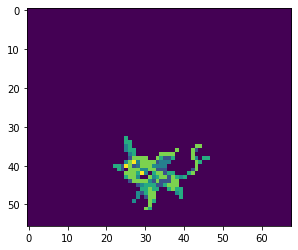

In [2]:
import matplotlib.pyplot as plt

n=100# elijo el número de Pokémon que quiero visualizar
plt.imshow(imagenes[n])
print(nombres[n]) # nombre del Pokémon
print(imagenes[n].shape) # tamaño del sprite (todos tienen el mismo tamaño)


Por otro lado, la información sobre los atributos de cada Pokémon (función) esta en un dataframe aparte:

In [3]:
filename = '/content/drive/My Drive/LaboDatos2022/TerceraEjercitacion/pokemon_dataframe.csv'
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,level_0,index,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,0,0,1,bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,1,1,1,2,ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,2,2,2,3,venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,3,4,4,charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,4,4,5,5,charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


Para poder trabajar con algoritmos de reducción de la dimensión y clustering, primero tenemos que representar los datos de sprites como una matriz, para eso tenemos que "desenrollarlos" como vimos en clase:

In [4]:
data = np.zeros((len(nombres),56*68))

for n,img in enumerate(imagenes):
  img.resize(56*68)
  data[n,:] = img


Los enunciados del TP 3 son los siguientes:

1.   Usar el criterio de la Silueta para verificar que hay un máximo local cerca de k=8 clusters. Aplicar el algoritmo kmeans con k=8 clusters sobre los datos de *sprites* (matriz *data*).
2.   Visualizar las primeras dos componentes de la matriz de *sprites*, pintando con un color distinto los datos que pertenezcan a cada cluster, e indicando con cruces la posición de los centroides (ayuda: el código para hacer esto se encuentra en el notebook de clustering que vimos en clase).
3.   Visualizar los primeros 10 elementos de cada cluster. 
4.   En un mismo gráfico de barras, mostrar el valor promedio de los atributos *HP*, *Attack*, *Defense* y *Speed* de cada cluster. ¿Cuál es el cluster de Pokémones más fuertes?
5.   Hacer lo mismo que en el ítem anterior, pero con el tamaño promedio de los Pokémones por cluster (el tamaño se define como la cantidad de entradas no vacías en la fila correspondiente al *sprite* de ese Pokémon en la matriz data). ¿Son los Pokémones más grandes los más fuertes?
6.   Hacer gráficos de torta con la proporción de Pokémones legendarios/no legendarios por cluster. ¿Tiene el cluster de Pokémones más fuertes más legendarios que los otros? 

**Optativo**

7.   Entrenar, evaluar y determinar la performance de un modelo de aprendizaje supervisado para predecir alguna característica de los Pokémones en base a sus *sprites*. Puede ser, por ejemplo, un modelo de regresión (predecir *HP*, *Attack*, *Defense*, *Speed*), un modelo de clasificación binaria (legendario o no legendario), o un modelo de clasificación multiclase (tipo del Pokémon: tierra, hielo, agua, fuego, etc).


# Primero importo librerias


In [5]:
# importamos los algoritmos de clusterizacion a utilizar en esta notebook
from sklearn.cluster import KMeans                    # K-means
from sklearn.cluster import AgglomerativeClustering   # Clustering jerárquico


# Clase para realizar componentes principales
from sklearn.decomposition import PCA

# Estandarizador (transforma las variables en z-scores)
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler() # Creamos el estandarizador

# importamos el puntaje de silhouette
from sklearn.metrics import silhouette_score

import matplotlib.ticker as ticker #esto para hacer mis graficos ej 4

# Enunciado 1

hago el criterio de la silueta.


In [6]:
silhouette_coefficients = []

for k in range(2, 30):
     kkkmeans = KMeans(n_clusters=k)
     kkkmeans.fit(data)
     score = silhouette_score(data, kkkmeans.labels_)
     silhouette_coefficients.append(score)

Text(0, 0.5, 'Promedio coeficientes de Silhouette')

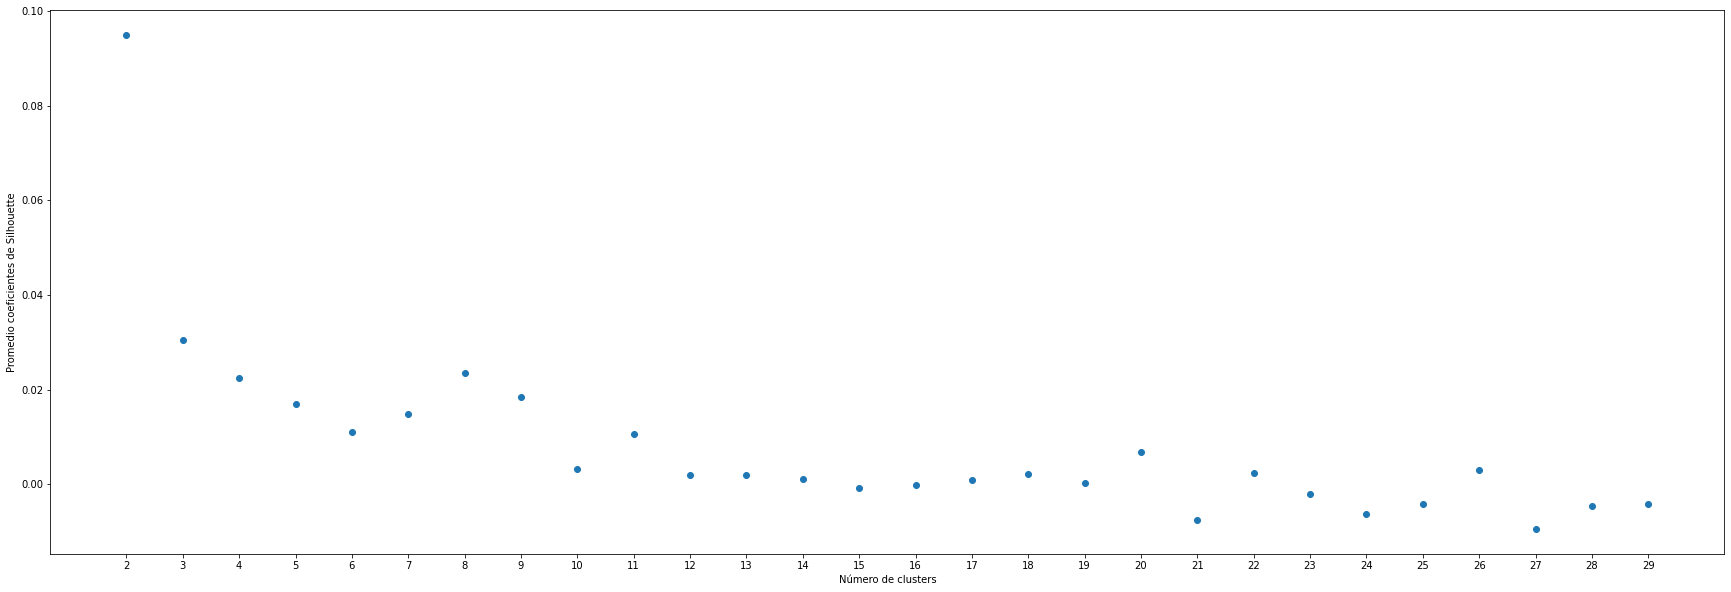

In [7]:
fig, ax = plt.subplots(figsize = (30,10))

# estas lineas son el grafico de SSEvsK
ax.scatter(range(2, 30), silhouette_coefficients)            
ax.set_xticks(range(2, 30))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("Promedio coeficientes de Silhouette")

Verificamos que efectivamente hay un maximo local cerca de k = 8 clusters.
Ahora aplicamos el algoritmo k-means con k=8 clusters sobre los datos de sprites (matriz data).

In [8]:
kmeans8 = KMeans(n_clusters=8) #aclaro q aca lo hago solo xq explicitamente lo pide en el enunciado, pero abajo lo vuelvo a hacer ya usando pca tambien.

kmeans8.fit(data)

KMeans()

# Enunciado 2


In [9]:
# Creación del modelo de PCA con 100 componentes
pca = PCA(n_components = 100)

# Ajuste y transformación de los datos
pca.fit(data)
X_pca = pca.transform(data)

In [10]:
kmeansNew = KMeans(n_clusters=8)# si, lo hago otra vez lol

kmeansNew.fit(X_pca)

KMeans()

In [11]:
# Guardo las posiciones de los centroids
centroids = kmeansNew.cluster_centers_

No handles with labels found to put in legend.


Text(0, 0.5, 'Segunda componente principal')

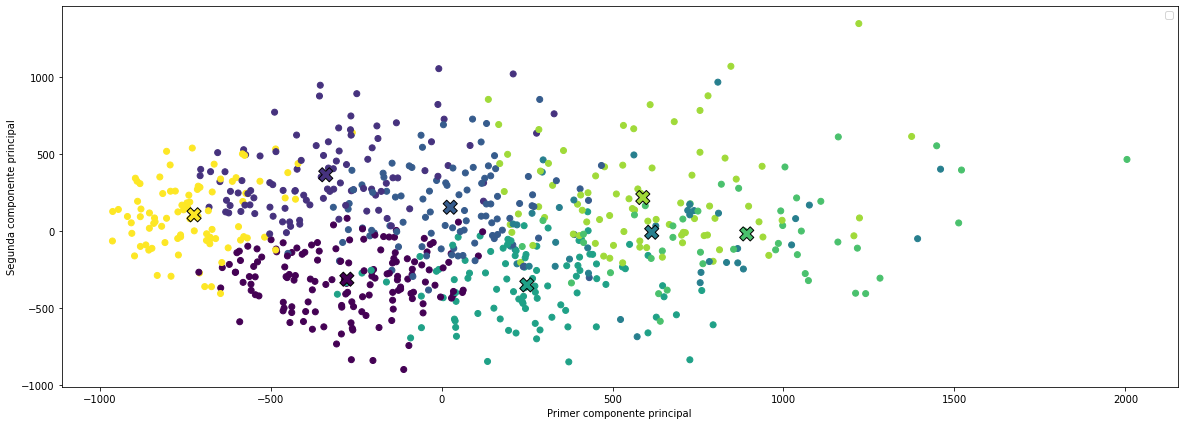

In [12]:
fig, ax = plt.subplots(figsize = (20, 7))

# Hacemos un scatter plot de cada uno de los datos
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeansNew.labels_)
ax.scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, linewidths=1,
            c=np.unique(kmeansNew.labels_), edgecolors='black')
ax.legend()

ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')

# Enunciado 3

Quiero poder visualizar los primeros 10 elementos de cada cluster.

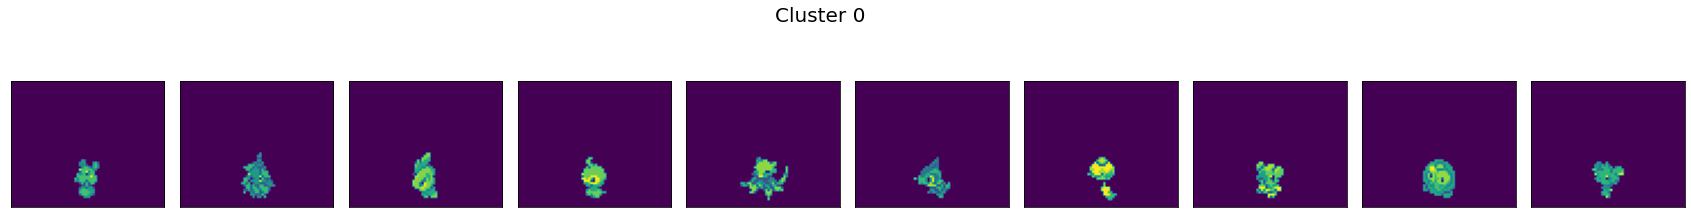

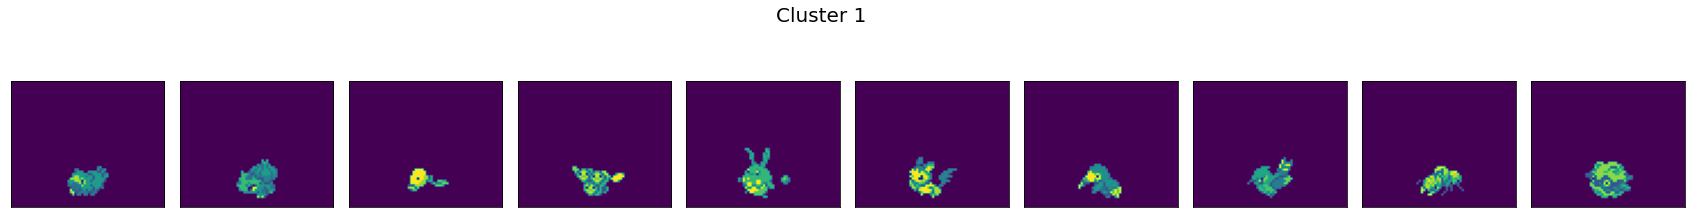

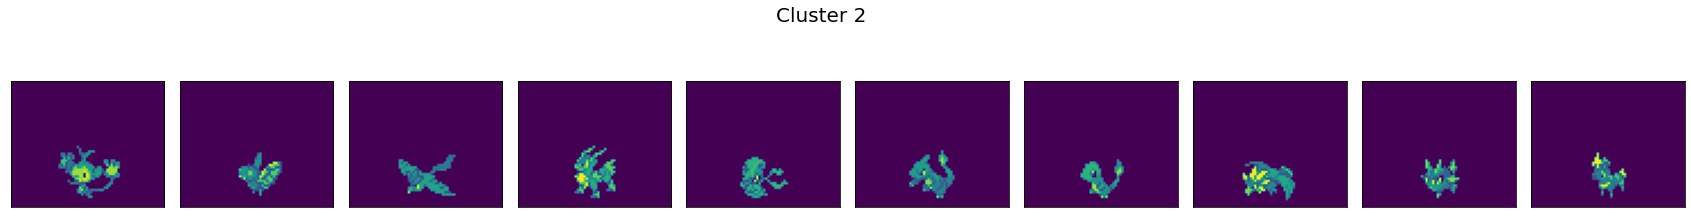

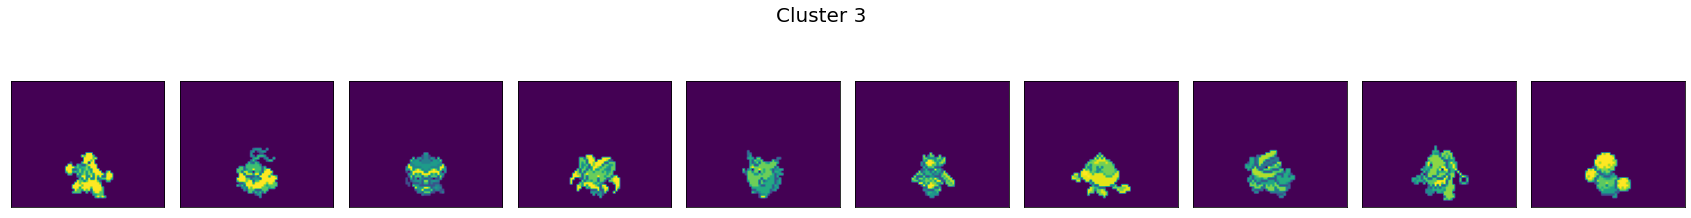

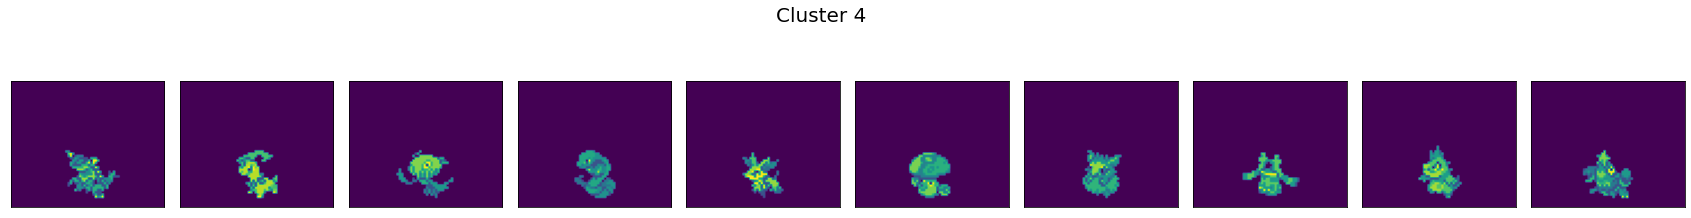

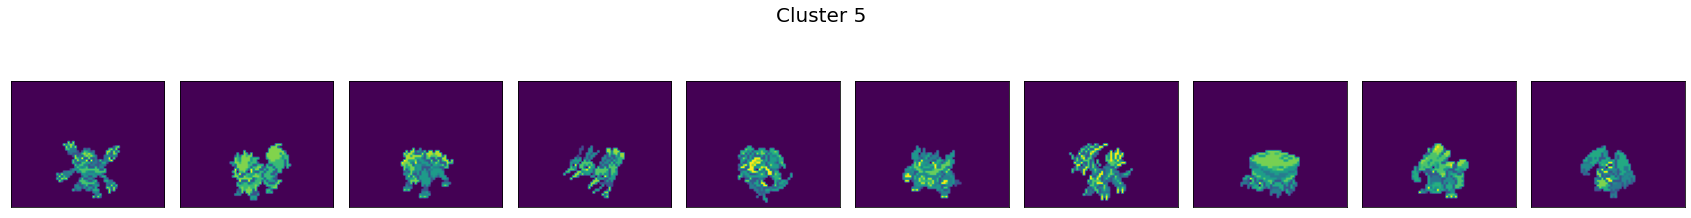

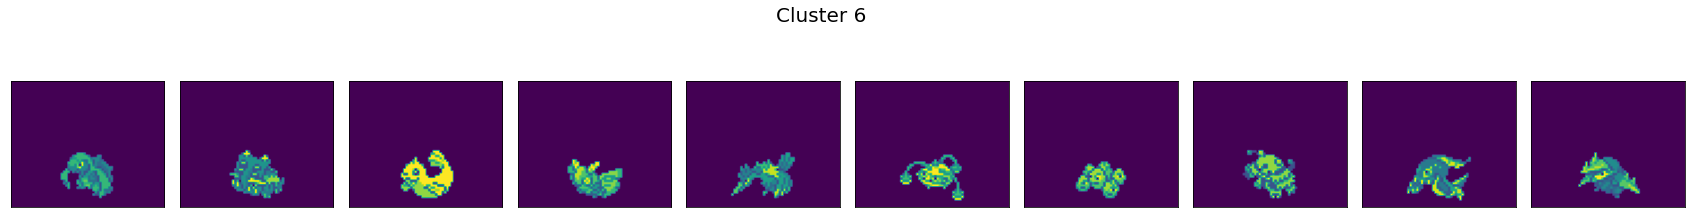

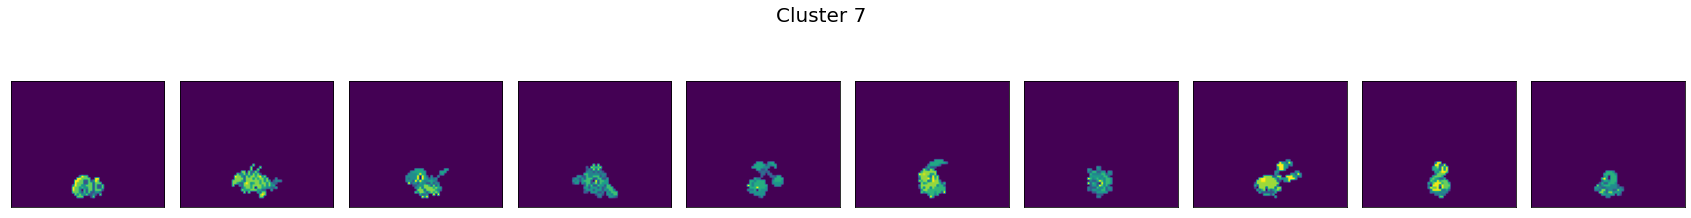

In [13]:
labels = kmeansNew.labels_

# Iniciamos un for con k=8 iteraciones
for i in range(8):
    index = np.nonzero(labels==i)[0]                                    # los índices correspondientes a la i-ésima etiqueta
    this_sprites = data[index].reshape(len(index),56,68)                # reshapeamos los samples del i-ésimo cluster para que tenga el formato de una imagen de (56,68) pixeles
    fig, axes = plt.subplots(1, 10, figsize=(30, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    fig.suptitle("Cluster " + str(i), fontsize=20)
    for i, ax in enumerate(axes.flat):
      ax.imshow(this_sprites[i])

# Enunciado 4

En un mismo gráfico de barras, mostrar el valor promedio de los atributos HP, Attack, Defense y Speed de cada cluster. ¿Cuál es el cluster de Pokémones más fuertes?

In [14]:
'''
idea:

for cada cluster:

  promediar: HP, Attack, Defense, Speed;
  hacer un grafico de barras q contenga estos promedios;

endfor 
'''
pokemones = '/content/drive/My Drive/LaboDatos2022/TerceraEjercitacion/pokemon_dataframe.csv'

df = pd.read_csv(pokemones)

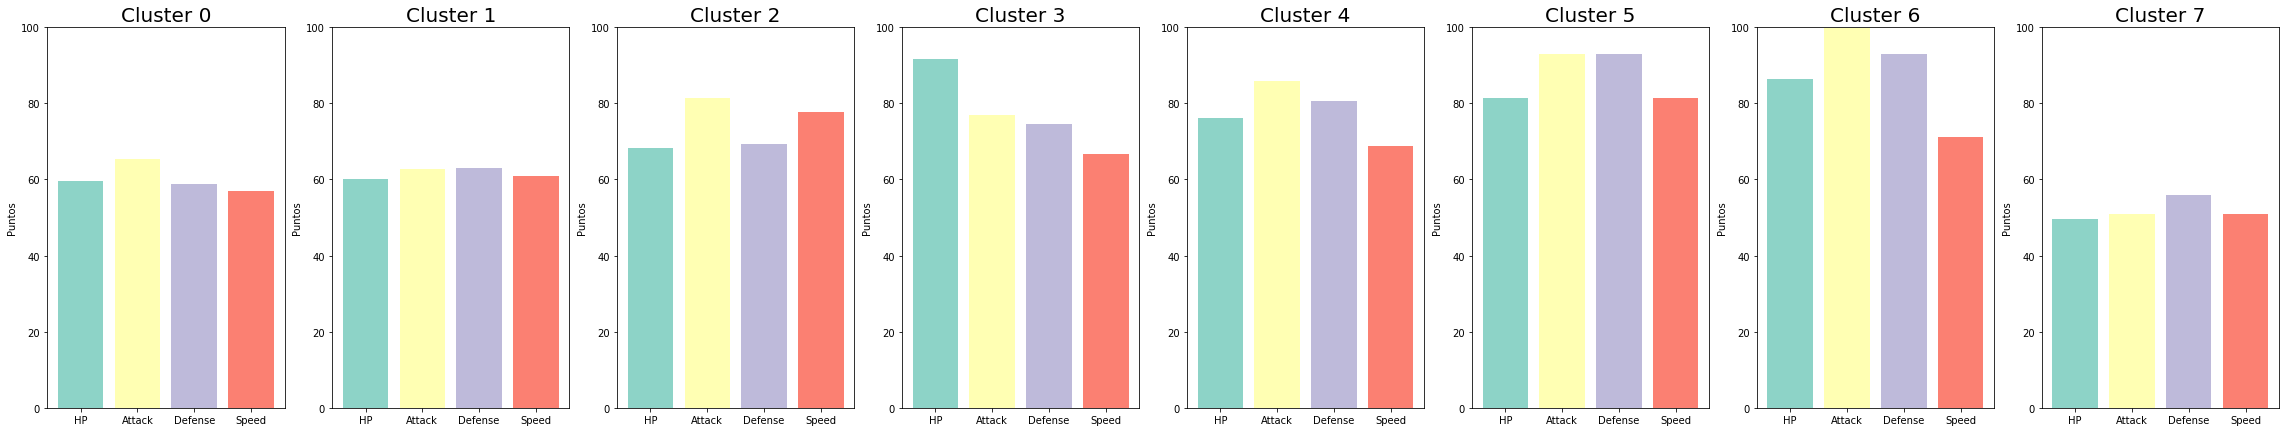

In [15]:
#paso nombres a np.array para hacer la indexacion despues
namaewa = np.array(nombres)

fig = plt.figure(figsize = (40,7))#preparo para haer los grafiquitos
fig.tight_layout()



for n in range(8):#hago los promedios y armo los graficos todo de una

  nombres_cluster = namaewa[labels== n] #en este array tengo todos los nombres de los pokemones pertenecientes a el cluster n
  dfCluster = df.loc[df['Name'].isin(nombres_cluster)]#aca tengo todos los datos de los pokemones pertenecientes a el cluster n

  cantPokemones = dfCluster.shape[0]
  HP = np.sum(dfCluster['HP']) / cantPokemones # promedio el hp del cluster y todo lo demas q se pide
  Attack = np.sum(dfCluster['Attack']) / cantPokemones
  Defense = np.sum(dfCluster['Defense']) / cantPokemones
  Speed = np.sum(dfCluster['Speed']) / cantPokemones
  
  promediosCluster = [HP,Attack,Defense,Speed]
  etiquetas_eje_x = ['HP','Attack','Defense','Speed']

  axs = fig.add_subplot(1,8,n+1)#voy metiendo cada grafico en orden
  axs.bar(etiquetas_eje_x, promediosCluster, color = plt.get_cmap('Set3').colors) #armo el grafico
  axs.set_title('Cluster ' + str(n),fontsize = 20)#titulo
  axs.set_ylabel('Puntos')
  axs.set_ylim(0,100)#por favor no hagas lo q quieras y ponete todo en la misma escala gracias
   
plt.show()


#Enunciado 5

Hacer lo mismo que en el ítem anterior, pero con el tamaño promedio de los Pokémones por cluster (el tamaño se define como la cantidad de entradas no vacías en la fila correspondiente al sprite de ese Pokémon en la matriz data). ¿Son los Pokémones más grandes los más fuertes?

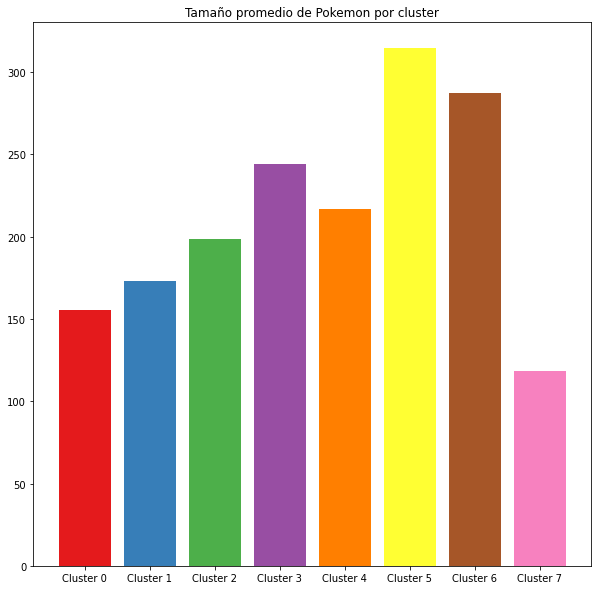

In [16]:
#labels tiene sus indices correspondidos con el nombre del pokemon y con la matriz data, va por ahi me parece
sumaCluster0 = 0
sumaCluster1 = 0
sumaCluster2 = 0
sumaCluster3 = 0
sumaCluster4 = 0
sumaCluster5 = 0
sumaCluster6 = 0
sumaCluster7 = 0

for i in range(len(labels)): #totalmente horrible y abusivo ya lo se, perdon
  if labels[i] == 0:
    sumaCluster0 = np.count_nonzero(data[i]) + sumaCluster0
  if labels[i] == 1:
    sumaCluster1 = np.count_nonzero(data[i]) + sumaCluster1
  if labels[i] == 2:
    sumaCluster2 = np.count_nonzero(data[i]) + sumaCluster2
  if labels[i] == 3:
    sumaCluster3 = np.count_nonzero(data[i]) + sumaCluster3
  if labels[i] == 4:
    sumaCluster4 = np.count_nonzero(data[i]) + sumaCluster4
  if labels[i] == 5:
    sumaCluster5 = np.count_nonzero(data[i]) + sumaCluster5
  if labels[i] == 6:
    sumaCluster6 = np.count_nonzero(data[i]) + sumaCluster6
  if labels[i] == 7:
    sumaCluster7 = np.count_nonzero(data[i]) + sumaCluster7

tamanios = np.array([sumaCluster0,sumaCluster1,sumaCluster2,sumaCluster3,sumaCluster4,sumaCluster5,sumaCluster6,sumaCluster7])#este es mi array con la suma de todos los tamanios de los pokemones en el cluster n
cantPokemones = np.zeros(8) #array q va a tener la cantidad de pokemones en cada cluster, corresponido con el indice, es decir cantPokemones[0] hace referencia al cluster 0
etiquetas_x = []


for n in range(8):
  nombres_cluster = namaewa[labels== n]
  cantPokemones[n] = len(nombres_cluster)
  etiquetas_x.append('Cluster '+ str(n))


promTamanio = tamanios / cantPokemones#llegamos a lo q queria, el promedio del tamanio de los pokemones en cada cluster

fig, axs = plt.subplots(figsize = (10, 10))#armo el grafiquito
axs.bar(etiquetas_x, promTamanio, color = plt.get_cmap('Set1').colors)
axs.set_title('Tamaño promedio de Pokemon por cluster')
plt.show()



#Enunciado 6
Hacer gráficos de torta con la proporción de Pokémones legendarios/no legendarios por cluster. ¿Tiene el cluster de Pokémones más fuertes más legendarios que los otros? 

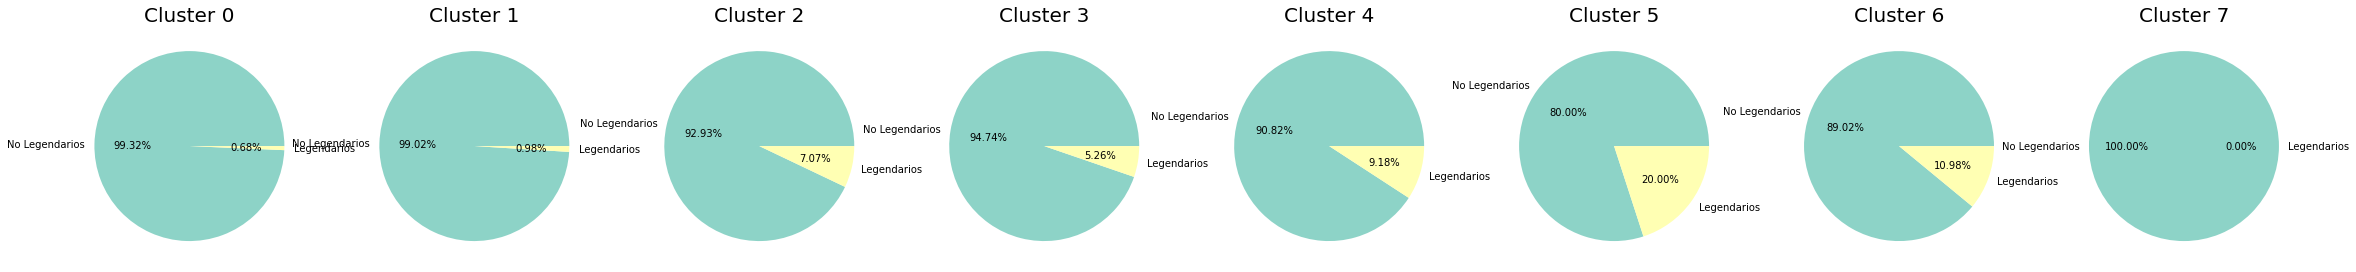

In [17]:
fig = plt.figure(figsize = (40,7))#preparo para haer los grafiquitos
fig.tight_layout()


for n in range(8):#hago los promedios y armo los graficos todo de una

  nombres_cluster = namaewa[labels== n] #en este array tengo todos los nombres de los pokemones pertenecientes a el cluster n
  dfCluster = df.loc[df['Name'].isin(nombres_cluster)]#aca tengo todos los datos de los pokemones pertenecientes a el cluster n

  cantPokemones = dfCluster.shape[0]
  legendarios = np.array([0,0])# array de 2 elementos, en [0] tenes la #pokemones no legendarios y en [1] tenes #pokemones legendarios

  for i in dfCluster['Legendary']:
    if i == False:
      legendarios[0] = legendarios[0] + 1
    if i == True:
      legendarios[1] = legendarios[1] + 1

  promedioLegendarios = legendarios / cantPokemones

  etiquetitas = ['No Legendarios','Legendarios']
  axs = fig.add_subplot(1,8,n+1)#voy metiendo cada grafico en orden
  axs.pie(x=promedioLegendarios, labels=etiquetitas, colors = plt.get_cmap('Set3').colors, autopct='%1.2f%%')
  axs.set_title('Cluster ' + str(n),fontsize = 20)#titulo

plt.show()




